# Import packages / libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [ ]:
# URL ke file Excel di GitHub
url = 'https://github.com/onesinus/ds-ml-dl-ai/raw/main/php-framework-and-cms.xlsx'

# Memuat lembar tertentu dari file Excel ke DataFrame menggunakan Pandas
df = pd.read_excel(url, sheet_name='Ones-Sheet2', engine='openpyxl')

# Tampilkan DataFrame
# print(df.head())
print(df)
# df.columns

                 Application Software          Category  \
0                         Directories               NaN   
1                               Files               NaN   
2                 Lines of Code (LOC)              Size   
3        Comment Lines of Code (CLOC)              Size   
4   Non-Comment Lines of Code (NCLOC)              Size   
..                                ...               ...   
65                              Issue  CodeFactor Issue   
66                        Complexitiy  CodeFactor Issue   
67                              Style  CodeFactor Issue   
68                       Maintability  CodeFactor Issue   
69                           Security  CodeFactor Issue   

                                 Indicator  Laravel       yii      yii2  \
0                             -Directories     18.0     315.0     176.0   
1                                   -Files     55.0    1998.0    1018.0   
2                 Size-Lines of Code (LOC)   2889.0  820072.0  197

In [ ]:
df

,Application Software,Category,Indicator,Laravel,yii,yii2,fuel,pixie,cakephp,joomla-cms,...,flarum,sage,PhpSpreadSheet,composer,Faker,guzzle,DesignPatternsPHP,monolog,yaf,phpredis
0,Directories,NaN,-Directories,18.0,315.0,176.0,10.0,5.0,339.0,1283.0,...,1.0,10.0,159.0,100.0,139.0,9.0,72.0,17.0,1.0,1.0
1,Files,NaN,-Files,55.0,1998.0,1018.0,16.0,24.0,1535.0,2758.0,...,3.0,27.0,1988.0,546.0,587.0,74.0,176.0,208.0,16.0,13.0
2,Lines of Code (LOC),Size,Size-Lines of Code (LOC),2889.0,820072.0,197727.0,1407.0,2868.0,357242.0,450839.0,...,90.0,681.0,246713.0,105355.0,138583.0,13162.0,4470.0,26797.0,2593.0,16270.0
3,Comment Lines of Code (CLOC),Size,Size-Comment Lines of Code (CLOC),1155.0,60416.0,59452.0,808.0,850.0,105771.0,156179.0,...,63.0,190.0,51118.0,20125.0,11394.0,2441.0,350.0,6687.0,552.0,6702.0
4,Non-Comment Lines of Code (NCLOC),Size,Size-Non-Comment Lines of Code (NCLOC),1734.0,759656.0,138275.0,599.0,2018.0,251471.0,294660.0,...,27.0,491.0,195595.0,85230.0,127189.0,10721.0,4120.0,20110.0,2041.0,9568.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Issue,CodeFactor Issue,CodeFactor Issue-Issue,NaN,1207.0,408.0,3.0,11929.0,14.0,7359.0,...,0.0,3.0,0.0,353.0,37.0,35.0,5.0,18.0,36.0,76.0
66,Complexitiy,CodeFactor Issue,CodeFactor Issue-Complexitiy,NaN,160.0,65.0,NaN,131.0,NaN,229.0,...,NaN,NaN,NaN,87.0,6.0,2.0,NaN,2.0,30.0,47.0
67,Style,CodeFactor Issue,CodeFactor Issue-Style,NaN,4.0,52.0,NaN,11600.0,2.0,4783.0,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.0,4.0
68,Maintability,CodeFactor Issue,CodeFactor Issue-Maintability,1.0,1027.0,286.0,3.0,158.0,12.0,2347.0,...,NaN,3.0,NaN,260.0,31.0,33.0,5.0,14.0,5.0,25.0


# Display null using heatmap

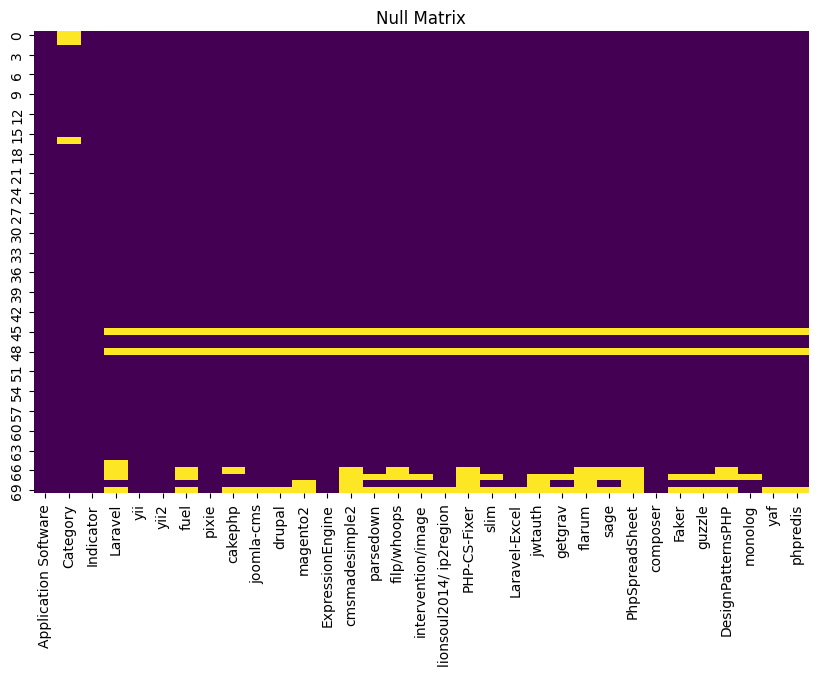

In [ ]:
# Menampilkan matriks menggunakan heatmap
null_matrix = df.isnull()

plt.figure(figsize=(10, 6))
sns.heatmap(null_matrix, cmap='viridis', cbar=False)
plt.title('Null Matrix')
plt.show()

# Missing value data imputation

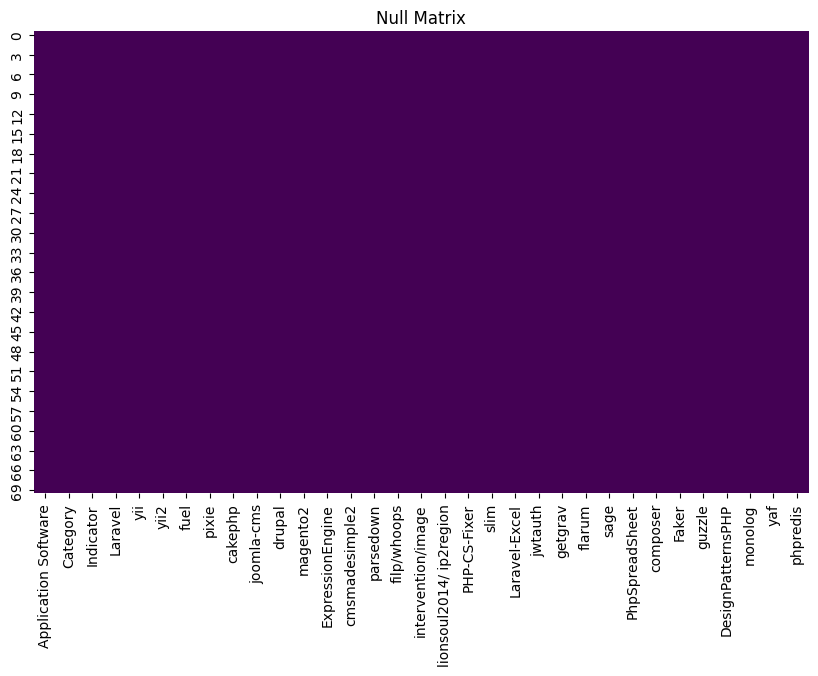

In [ ]:
df_cleaned = df.fillna(0)
null_matrix = df_cleaned.isnull()

plt.figure(figsize=(10, 6))
sns.heatmap(null_matrix, cmap='viridis', cbar=False)
plt.title('Null Matrix')
plt.show()

# Transposing the data

In [ ]:
# Transpose the dataframe so that frameworks become the index
df_transposed = df_cleaned.drop(["Application Software", "Category"], axis=1).transpose()

# Set the first row as the header
df_transposed.columns = df_transposed.iloc[0]

# Remove the first row (Application Software)
df_transposed = df_transposed[1:]

# Reset the index
df_transposed.reset_index(inplace=True)

# Rename the index column to "Framework"
df_transposed.rename(columns={'index': 'Framework'}, inplace=True)

# Display the transposed dataframe
# print(df_transposed.head(3))
print(df_transposed.to_string(index=False))

              Framework -Directories   -Files Size-Lines of Code (LOC) Size-Comment Lines of Code (CLOC) Size-Non-Comment Lines of Code (NCLOC) Size-Logical Lines of Code (LLOC) Size-Classes Classes-Average Class Length Classes-Minimum Class Length Classes-Maximum Class Length Classes-Average Method Length Classes-Minimum Method Length Classes-Maximum Method Length Classes-Average Methods Per Class Classes-Minimum Methods Per Class Classes-Maximum Methods Per Class -Functions Functions-Average Function Length Functions-Not in classes or functions Cyclomatic Complexity-Average Complexity per LLOC Cyclomatic Complexity-Average Complexity per Class Cyclomatic Complexity-Minimum Class Complexity Cyclomatic Complexity-Maximum Class Complexity Cyclomatic Complexity-Average Complexity per Method Cyclomatic Complexity-Minimum Method Complexity Cyclomatic Complexity-Maximum Method Complexity Dependencies-Global Accesses Dependencies-Global Constants Dependencies-Global Variables Dependencies-Su

# Show columns

In [ ]:
print(df_transposed.columns)

Index(['Framework', '-Directories', '-Files', 'Size-Lines of Code (LOC)',
       'Size-Comment Lines of Code (CLOC)',
       'Size-Non-Comment Lines of Code (NCLOC)',
       'Size-Logical Lines of Code (LLOC)', 'Size-Classes',
       'Classes-Average Class Length', 'Classes-Minimum Class Length',
       'Classes-Maximum Class Length', 'Classes-Average Method Length',
       'Classes-Minimum Method Length', 'Classes-Maximum Method Length',
       'Classes-Average Methods Per Class',
       'Classes-Minimum Methods Per Class',
       'Classes-Maximum Methods Per Class', '-Functions',
       'Functions-Average Function Length',
       'Functions-Not in classes or functions',
       'Cyclomatic Complexity-Average Complexity per LLOC',
       'Cyclomatic Complexity-Average Complexity per Class',
       'Cyclomatic Complexity-Minimum Class Complexity',
       'Cyclomatic Complexity-Maximum Class Complexity',
       'Cyclomatic Complexity-Average Complexity per Method',
       'Cyclomatic Com

# Clustering example using 2 features

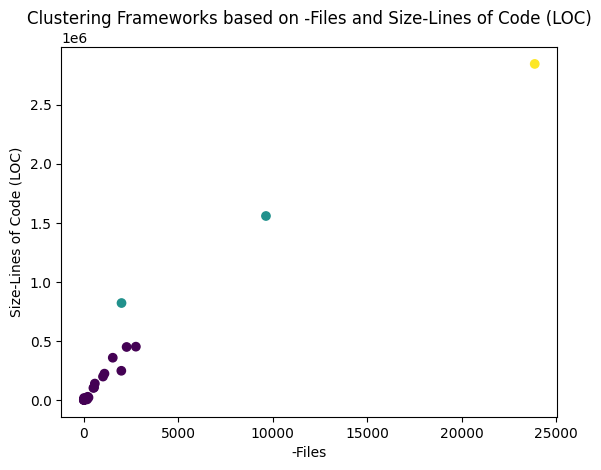

Indicator                Framework  Cluster
0                          Laravel        0
27                         monolog        0
26               DesignPatternsPHP        0
25                          guzzle        0
24                           Faker        0
23                        composer        0
22                  PhpSpreadSheet        0
21                            sage        0
20                          flarum        0
19                         getgrav        0
18                         jwtauth        0
17                   Laravel-Excel        0
16                            slim        0
15                    PHP-CS-Fixer        0
14         lionsoul2014/ ip2region        0
13              intervention/image        0
12                     filp/whoops        0
11                       parsedown        0
10                  cmsmadesimple2        0
9                 ExpressionEngine        0
6                       joomla-cms        0
5                          cakep

In [ ]:
# Features for clustering
features = ["-Files", "Size-Lines of Code (LOC)"]

# Select features
X = df_transposed[features]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, n_init=2)
kmeans.fit(X)
df_transposed['Cluster'] = kmeans.labels_
df_sorted = df_transposed.sort_values(by='Cluster')

# Visualize the clusters
plt.scatter(df_sorted['-Files'], df_sorted['Size-Lines of Code (LOC)'], c=df_sorted['Cluster'], cmap='viridis')
plt.xlabel('-Files')
plt.ylabel('Size-Lines of Code (LOC)')
plt.title('Clustering Frameworks based on -Files and Size-Lines of Code (LOC)')
plt.show()

# Print the clustered frameworks
print(df_sorted[['Framework', 'Cluster']])

# PCA & Dimensionaly reduction

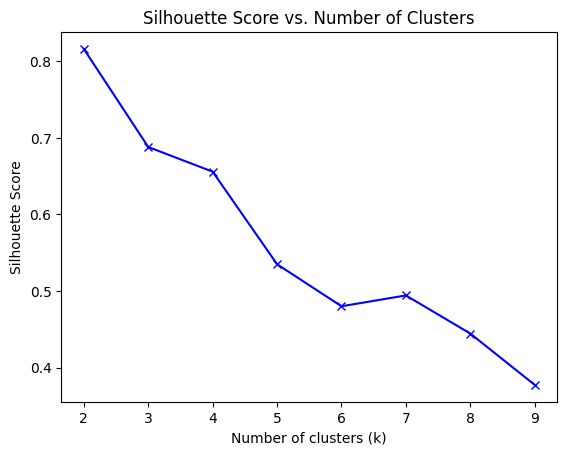

In [ ]:
# Mengambil fitur yang akan digunakan untuk clustering
# X = df_transposed.iloc[:, 1:]
X = df_transposed.iloc[:, 1:]

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(X_scaled)

# Silhouette score

In [ ]:
# Menentukan jumlah cluster yang optimal menggunakan Elbow Method
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=2)
    kmeans.fit(data_reduced)
    silhouette_scores.append(silhouette_score(data_reduced, kmeans.labels_))

# Visualisasi Elbow Method
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [ ]:
print(silhouette_scores)

[0.8161609551012644, 0.6880397876442325, 0.6558152130500446, 0.5349424923034836, 0.48004155253561137, 0.4941954948301553, 0.44437597555819125, 0.37730259627430246]


In [ ]:
df_transposed

Indicator,Framework,-Directories,-Files,Size-Lines of Code (LOC),Size-Comment Lines of Code (CLOC),Size-Non-Comment Lines of Code (NCLOC),Size-Logical Lines of Code (LLOC),Size-Classes,Classes-Average Class Length,Classes-Minimum Class Length,...,Pull Request-open,Pull Request-Close,Github Issues-open,Github Issues-close,CodeFactor Issue-Issue,CodeFactor Issue-Complexitiy,CodeFactor Issue-Style,CodeFactor Issue-Maintability,CodeFactor Issue-Security,Cluster
0,Laravel,18.0,55.0,2889.0,1155.0,1734.0,121.0,45.0,1.0,0.0,...,2.0,4387.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,yii,315.0,1998.0,820072.0,60416.0,759656.0,39618.0,35124.0,36.0,0.0,...,1.0,1792.0,5.0,2692.0,1207.0,160.0,4.0,1027.0,16.0,1
2,yii2,176.0,1018.0,197727.0,59452.0,138275.0,41429.0,41162.0,40.0,0.0,...,79.0,7900.0,450.0,10892.0,408.0,65.0,52.0,286.0,5.0,0
3,fuel,10.0,16.0,1407.0,808.0,599.0,64.0,11.0,2.0,1.0,...,0.0,243.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0
4,pixie,5.0,24.0,2868.0,850.0,2018.0,606.0,604.0,25.0,0.0,...,11.0,69.0,35.0,91.0,11929.0,131.0,11600.0,158.0,35.0,0
5,cakephp,339.0,1535.0,357242.0,105771.0,251471.0,81304.0,80630.0,60.0,0.0,...,7.0,10480.0,37.0,6308.0,14.0,0.0,2.0,12.0,0.0,0
6,joomla-cms,1283.0,2758.0,450839.0,156179.0,294660.0,87272.0,68947.0,34.0,0.0,...,242.0,24031.0,700.0,13835.0,7359.0,229.0,4783.0,2347.0,0.0,0
7,drupal,2431.0,9644.0,1556649.0,444318.0,1112331.0,260695.0,257681.0,27.0,0.0,...,1.0,103.0,8.0,121.0,2435.0,28.0,1323.0,1084.0,0.0,1
8,magento2,8713.0,23870.0,2843533.0,851470.0,1992063.0,506342.0,483508.0,22.0,0.0,...,810.0,12901.0,1307.0,21389.0,1299.0,318.0,981.0,0.0,0.0,2
9,ExpressionEngine,517.0,2268.0,448134.0,104209.0,343925.0,86724.0,81151.0,46.0,0.0,...,37.0,1243.0,365.0,1008.0,2594.0,487.0,17.0,2081.0,9.0,0


# Clustering using feature 1 & 2

Hasil clustering:
[1 0 2]


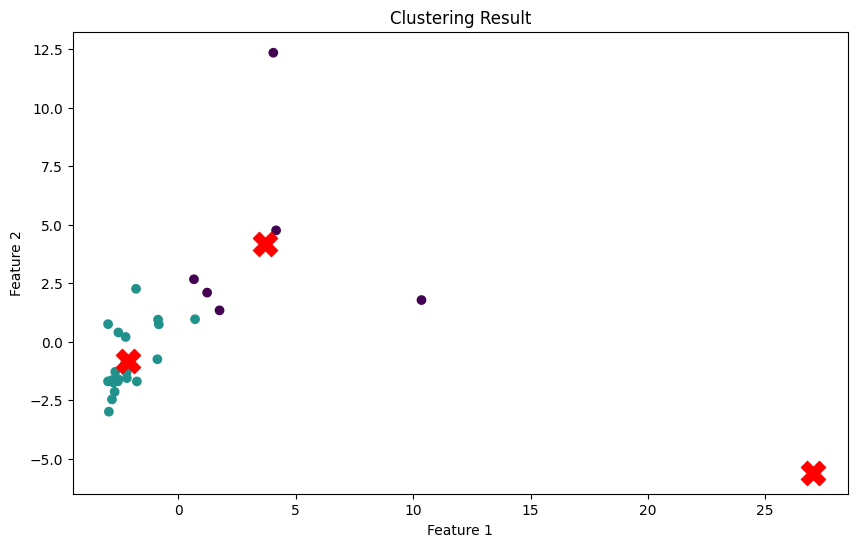

In [ ]:
# Memilih jumlah cluster berdasarkan elbow method
# optimal_k = np.argmax(silhouette_scores) + 2
optimal_k = 3

# Melakukan clustering dengan jumlah cluster yang optimal
kmeans = KMeans(n_clusters=optimal_k, n_init=2)
kmeans.fit(data_reduced)

# Menambahkan kolom cluster ke dataframe
df_transposed['Cluster'] = kmeans.labels_

# Menampilkan hasil clustering
print("Hasil clustering:")
# print(df_transposed.head(3))
print(df_transposed["Cluster"].unique())

# Visualisasi hasil clustering (contoh: menggunakan scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

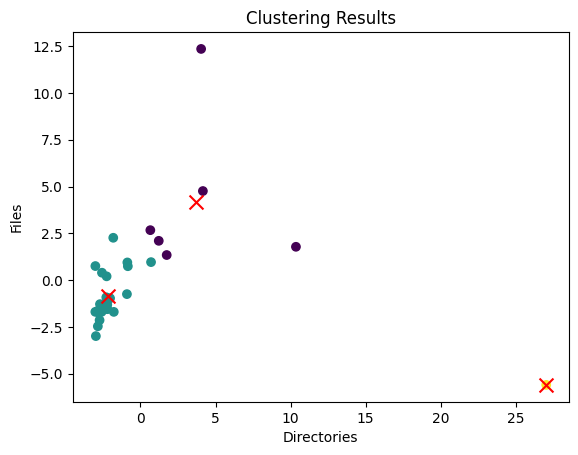

In [ ]:
# Visualize clusters (example for 2D data_reduced)
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)  # Plot cluster centers
plt.xlabel('Directories')
plt.ylabel('Files')
plt.title('Clustering Results')
plt.show()

# Visualize Clustering Result

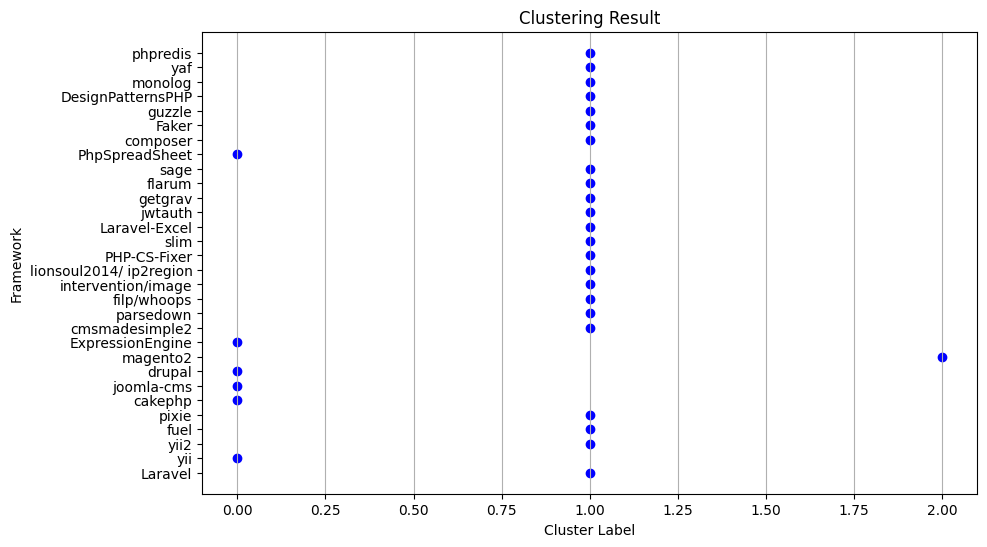

In [ ]:
# Create a scatter plot of framework names with their corresponding cluster labels
plt.figure(figsize=(10, 6))

# Plot each data point (framework) with its cluster label
for i, (framework, label) in enumerate(zip(df_transposed['Framework'], kmeans.labels_)):
    plt.scatter(label, i, color='blue')  # Adjust color and size as needed
    # plt.text(label, i, framework, fontsize=8, ha='right')  # Add framework name as text

plt.yticks(range(len(df_transposed['Framework'])), df_transposed['Framework'])  # Set y-ticks as framework names
plt.title('Clustering Result')
plt.xlabel('Cluster Label')
plt.ylabel('Application')
plt.grid(axis='x')  # Add grid lines for better readability
plt.show()

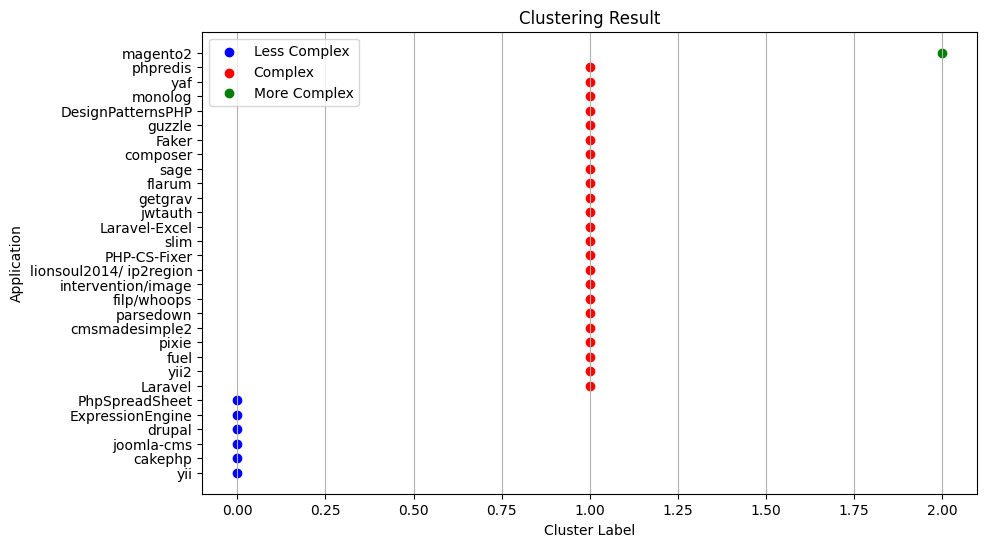

In [ ]:
# Create lists to store framework names for each cluster
cluster_0_frameworks = []
cluster_1_frameworks = []
cluster_2_frameworks = []

# Iterate over the dataframe and separate framework names by cluster
for framework, label in zip(df_transposed['Framework'], kmeans.labels_):
    if label == 0:
        cluster_0_frameworks.append(framework)
    elif label == 1:
        cluster_1_frameworks.append(framework)
    else:
        cluster_2_frameworks.append(framework)

# Plotting
plt.figure(figsize=(10, 6))

# Plot framework names for each cluster
plt.scatter([0]*len(cluster_0_frameworks), cluster_0_frameworks, color='blue', label='Less Complex')
plt.scatter([1]*len(cluster_1_frameworks), cluster_1_frameworks, color='red', label='Complex')
plt.scatter([2]*len(cluster_2_frameworks), cluster_2_frameworks, color='green', label='More Complex')

plt.title('Clustering Result')
plt.xlabel('Cluster Label')
plt.ylabel('Application')
plt.legend()
plt.grid(axis='x')  # Add grid lines for better readability
plt.show()


In [ ]:
# print(df[0:3])

In [ ]:
# # Extract features for clustering
# X = df_cleaned.iloc[:, 2:]  # Extracting columns from the 3rd column onwards as features

# # Normalize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Determine the optimal number of clusters using the Elbow Method
# k_values = range(2, 10)
# silhouette_scores = []

# for k in k_values:
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(X_scaled)
#     silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# # Visualize the Elbow Method
# plt.plot(k_values, silhouette_scores, 'bx-')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score vs. Number of Clusters')
# plt.show()

# # Choose the number of clusters based on the Elbow Method
# optimal_k = np.argmax(silhouette_scores) + 2

# # Perform clustering with the optimal number of clusters
# kmeans = KMeans(n_clusters=optimal_k, n_init=3)
# kmeans.fit(X_scaled)

# # Add the cluster column to the dataframe
# df_cleaned['Cluster'] = kmeans.labels_

# # Display the clustering results
# print("Clustering Results:")
# print(df_cleaned[['Application Software', 'Category', 'Cluster']])

# # Apply PCA to reduce the dimensionality of the data
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# # Visualize the clustering results using PCA
# plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
# plt.title('Clustering Result (PCA)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()